# Aircraft Price Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d mehmet0sahinn/aircraft-price-analysis-and-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/mehmet0sahinn/aircraft-price-analysis-and-prediction-dataset
License(s): world-bank
  0%|                                               | 0.00/16.9k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 16.9k/16.9k [00:00<00:00, 1.47MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Aircraft Price  Prediction/aircraft-price-analysis-and-prediction-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Aircraft Price  Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('aircraft_price.csv')

In [5]:
df.head()

,model_name,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,303.0,449.0,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,247.0,433.0,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,257.0,420.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,257.0,420.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,257.0,420.0,175.0,1250000.0


In [6]:
df.shape

(517, 16)

In [7]:
df.size

8272

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_name        517 non-null    object 
 1   engine_type       517 non-null    object 
 2   engine_power      517 non-null    float64
 3   max_speed         517 non-null    float64
 4   cruise_speed      517 non-null    float64
 5   stall_speed       517 non-null    float64
 6   fuel_tank         517 non-null    float64
 7   all_eng_roc       517 non-null    float64
 8   out_eng_roc       517 non-null    float64
 9   takeoff_distance  517 non-null    float64
 10  landing_distance  517 non-null    float64
 11  empty_weight      517 non-null    float64
 12  length            517 non-null    float64
 13  wing_span         517 non-null    float64
 14  range             517 non-null    float64
 15  price             507 non-null    float64
dtypes: float64(14), object(2)
memory usage: 64.8

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_power,517.0,8.693288e+02,1.783603e+03,60.0,200.0,285.0,550.0,14750.0
max_speed,517.0,2.127950e+02,1.141068e+02,64.0,143.0,177.0,238.0,755.0
cruise_speed,517.0,2.001779e+02,1.033581e+02,70.0,131.0,169.0,229.0,511.0
stall_speed,517.0,6.065667e+01,1.643287e+01,27.0,50.0,56.0,73.0,115.0
fuel_tank,517.0,1.419379e+03,4.278321e+03,12.0,50.0,89.0,335.0,41000.0
all_eng_roc,517.0,1.717559e+03,1.453490e+03,360.0,924.0,1200.0,1861.0,11673.0
out_eng_roc,517.0,2.047066e+03,1.123434e+03,457.0,1365.0,1706.0,2280.0,6400.0
takeoff_distance,517.0,1.732750e+03,7.136470e+02,500.0,1265.0,1525.0,2110.0,4850.0
landing_distance,517.0,7.485489e+03,1.028944e+04,567.0,2650.0,3625.0,8800.0,89400.0
empty_weight,517.0,4.377446e+03,5.649708e+03,23.0,1575.0,2286.5,5164.0,46800.0


In [10]:
df.isnull().sum()

model_name           0
engine_type          0
engine_power         0
max_speed            0
cruise_speed         0
stall_speed          0
fuel_tank            0
all_eng_roc          0
out_eng_roc          0
takeoff_distance     0
landing_distance     0
empty_weight         0
length               0
wing_span            0
range                0
price               10
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

model_name          284
engine_type           3
engine_power        113
max_speed           208
cruise_speed        188
stall_speed          69
fuel_tank           173
all_eng_roc         260
out_eng_roc         277
takeoff_distance    242
landing_distance    209
empty_weight        426
length              180
wing_span           130
range               296
price               177
dtype: int64

## Data Visualization

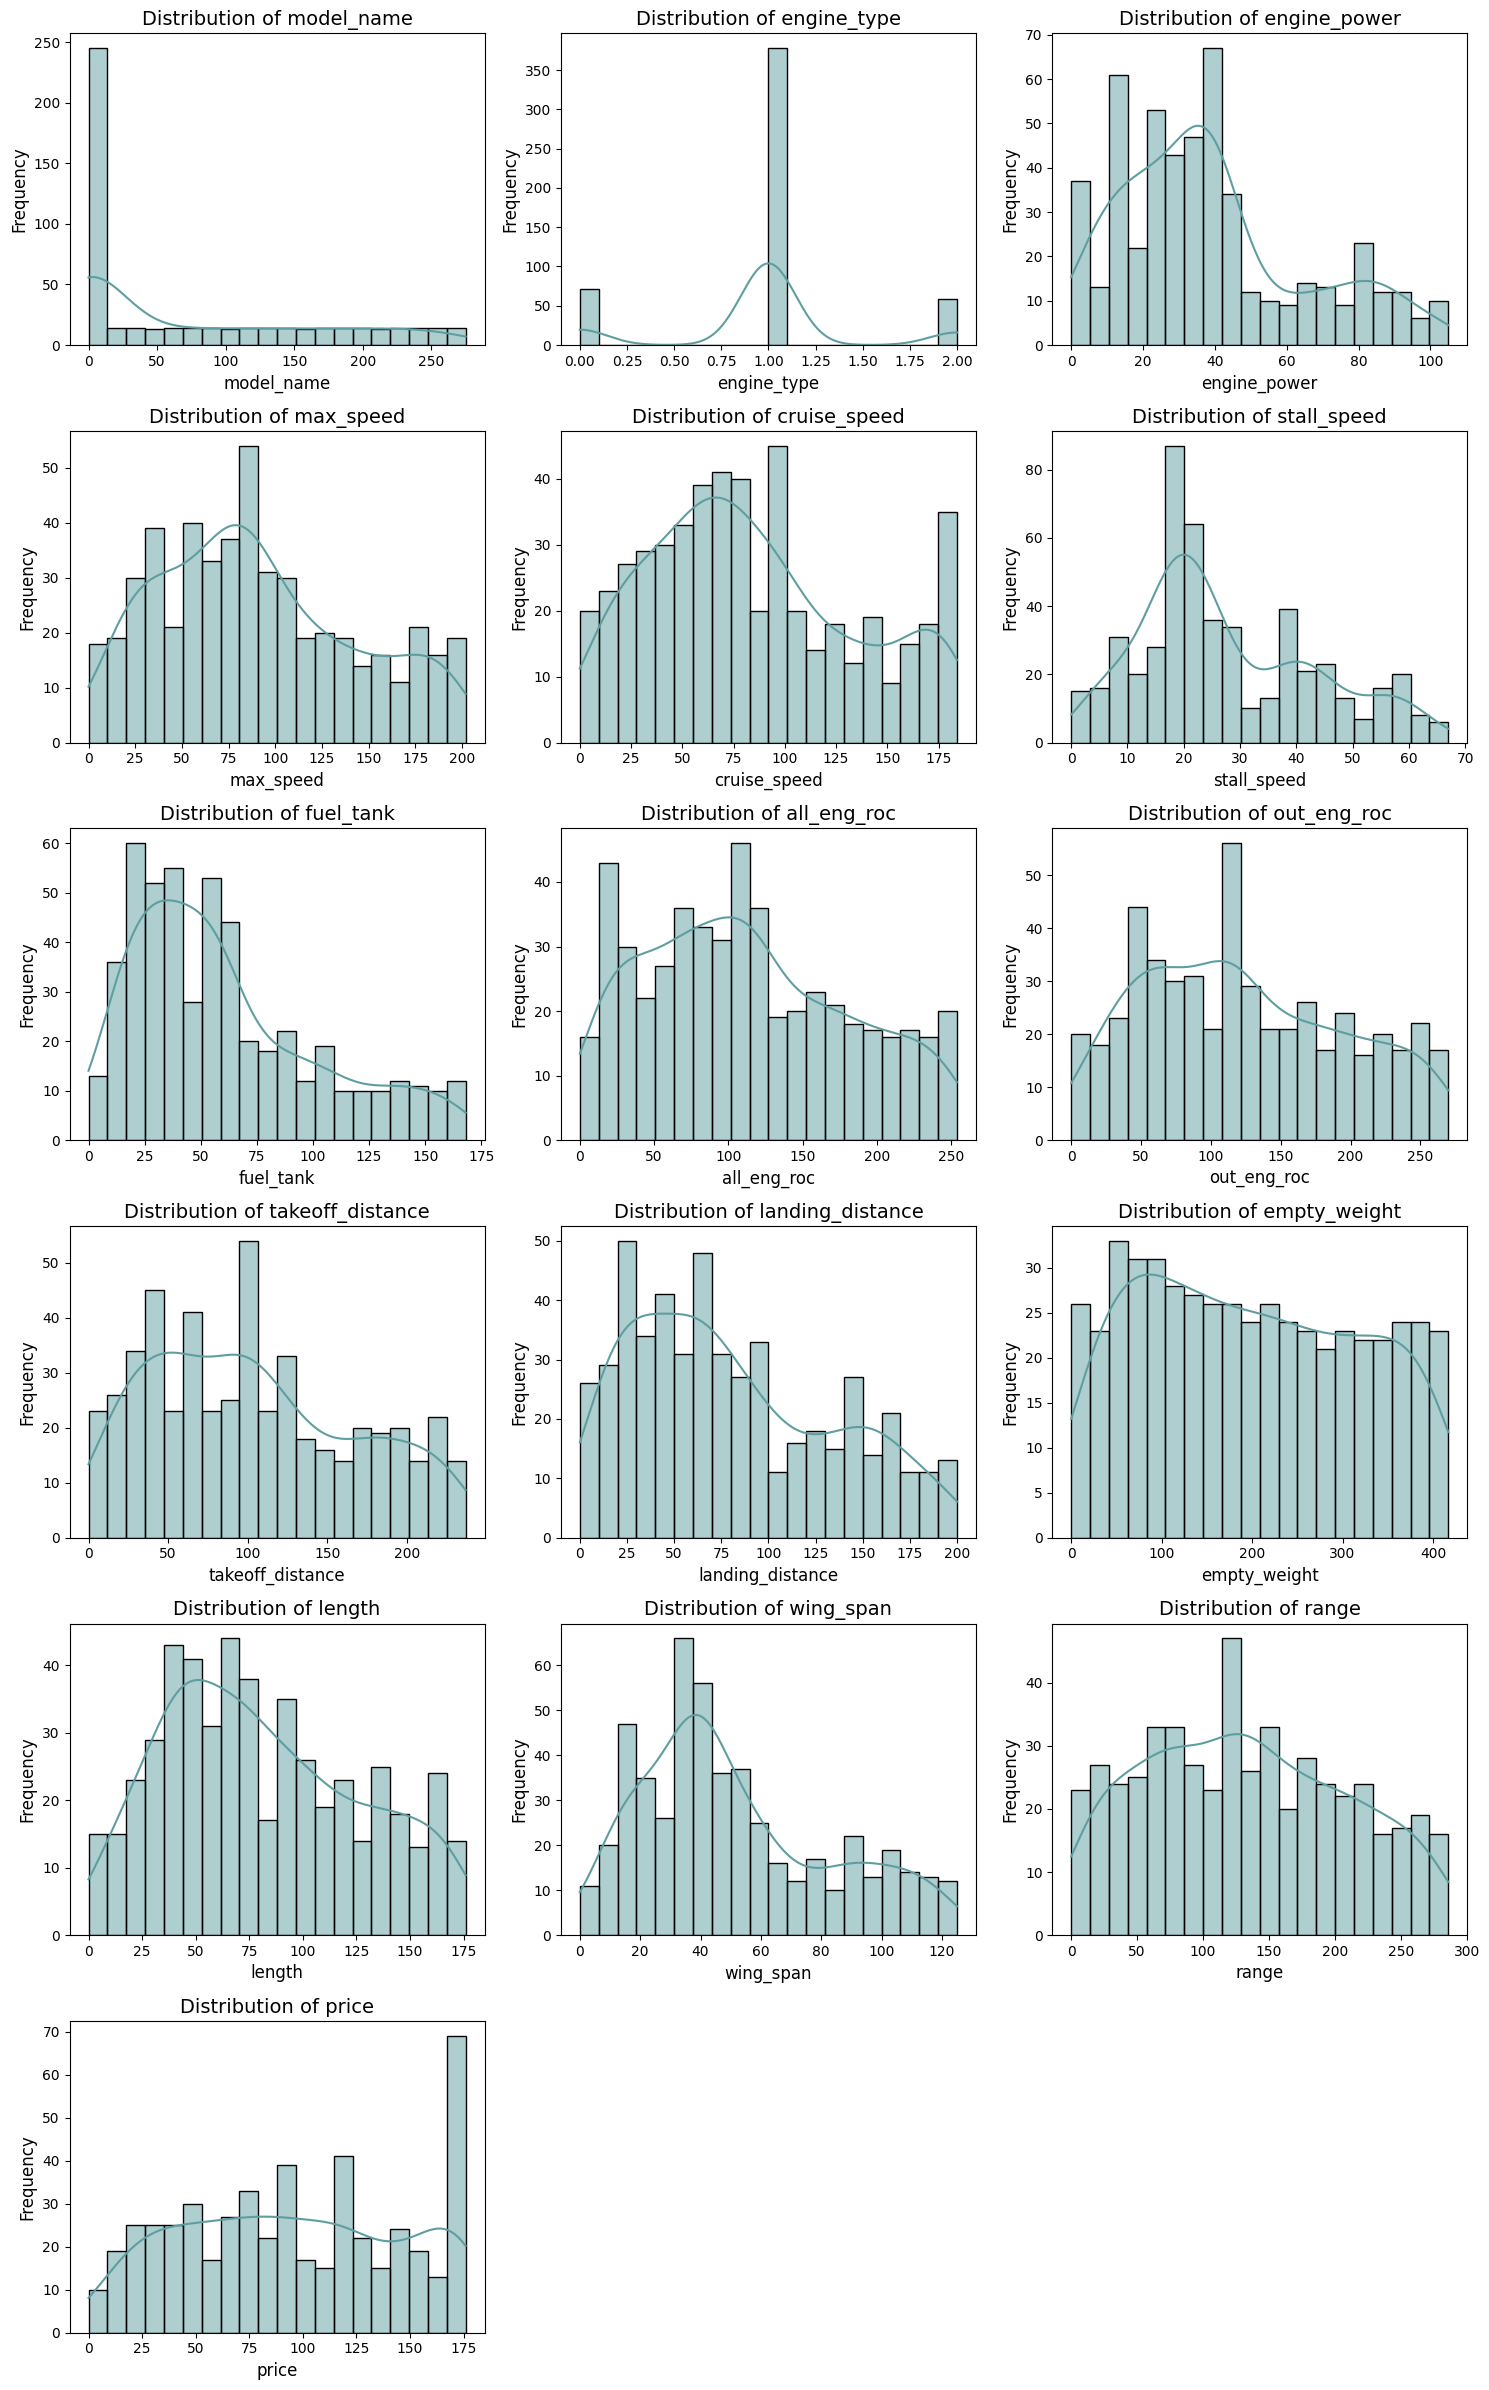

In [22]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

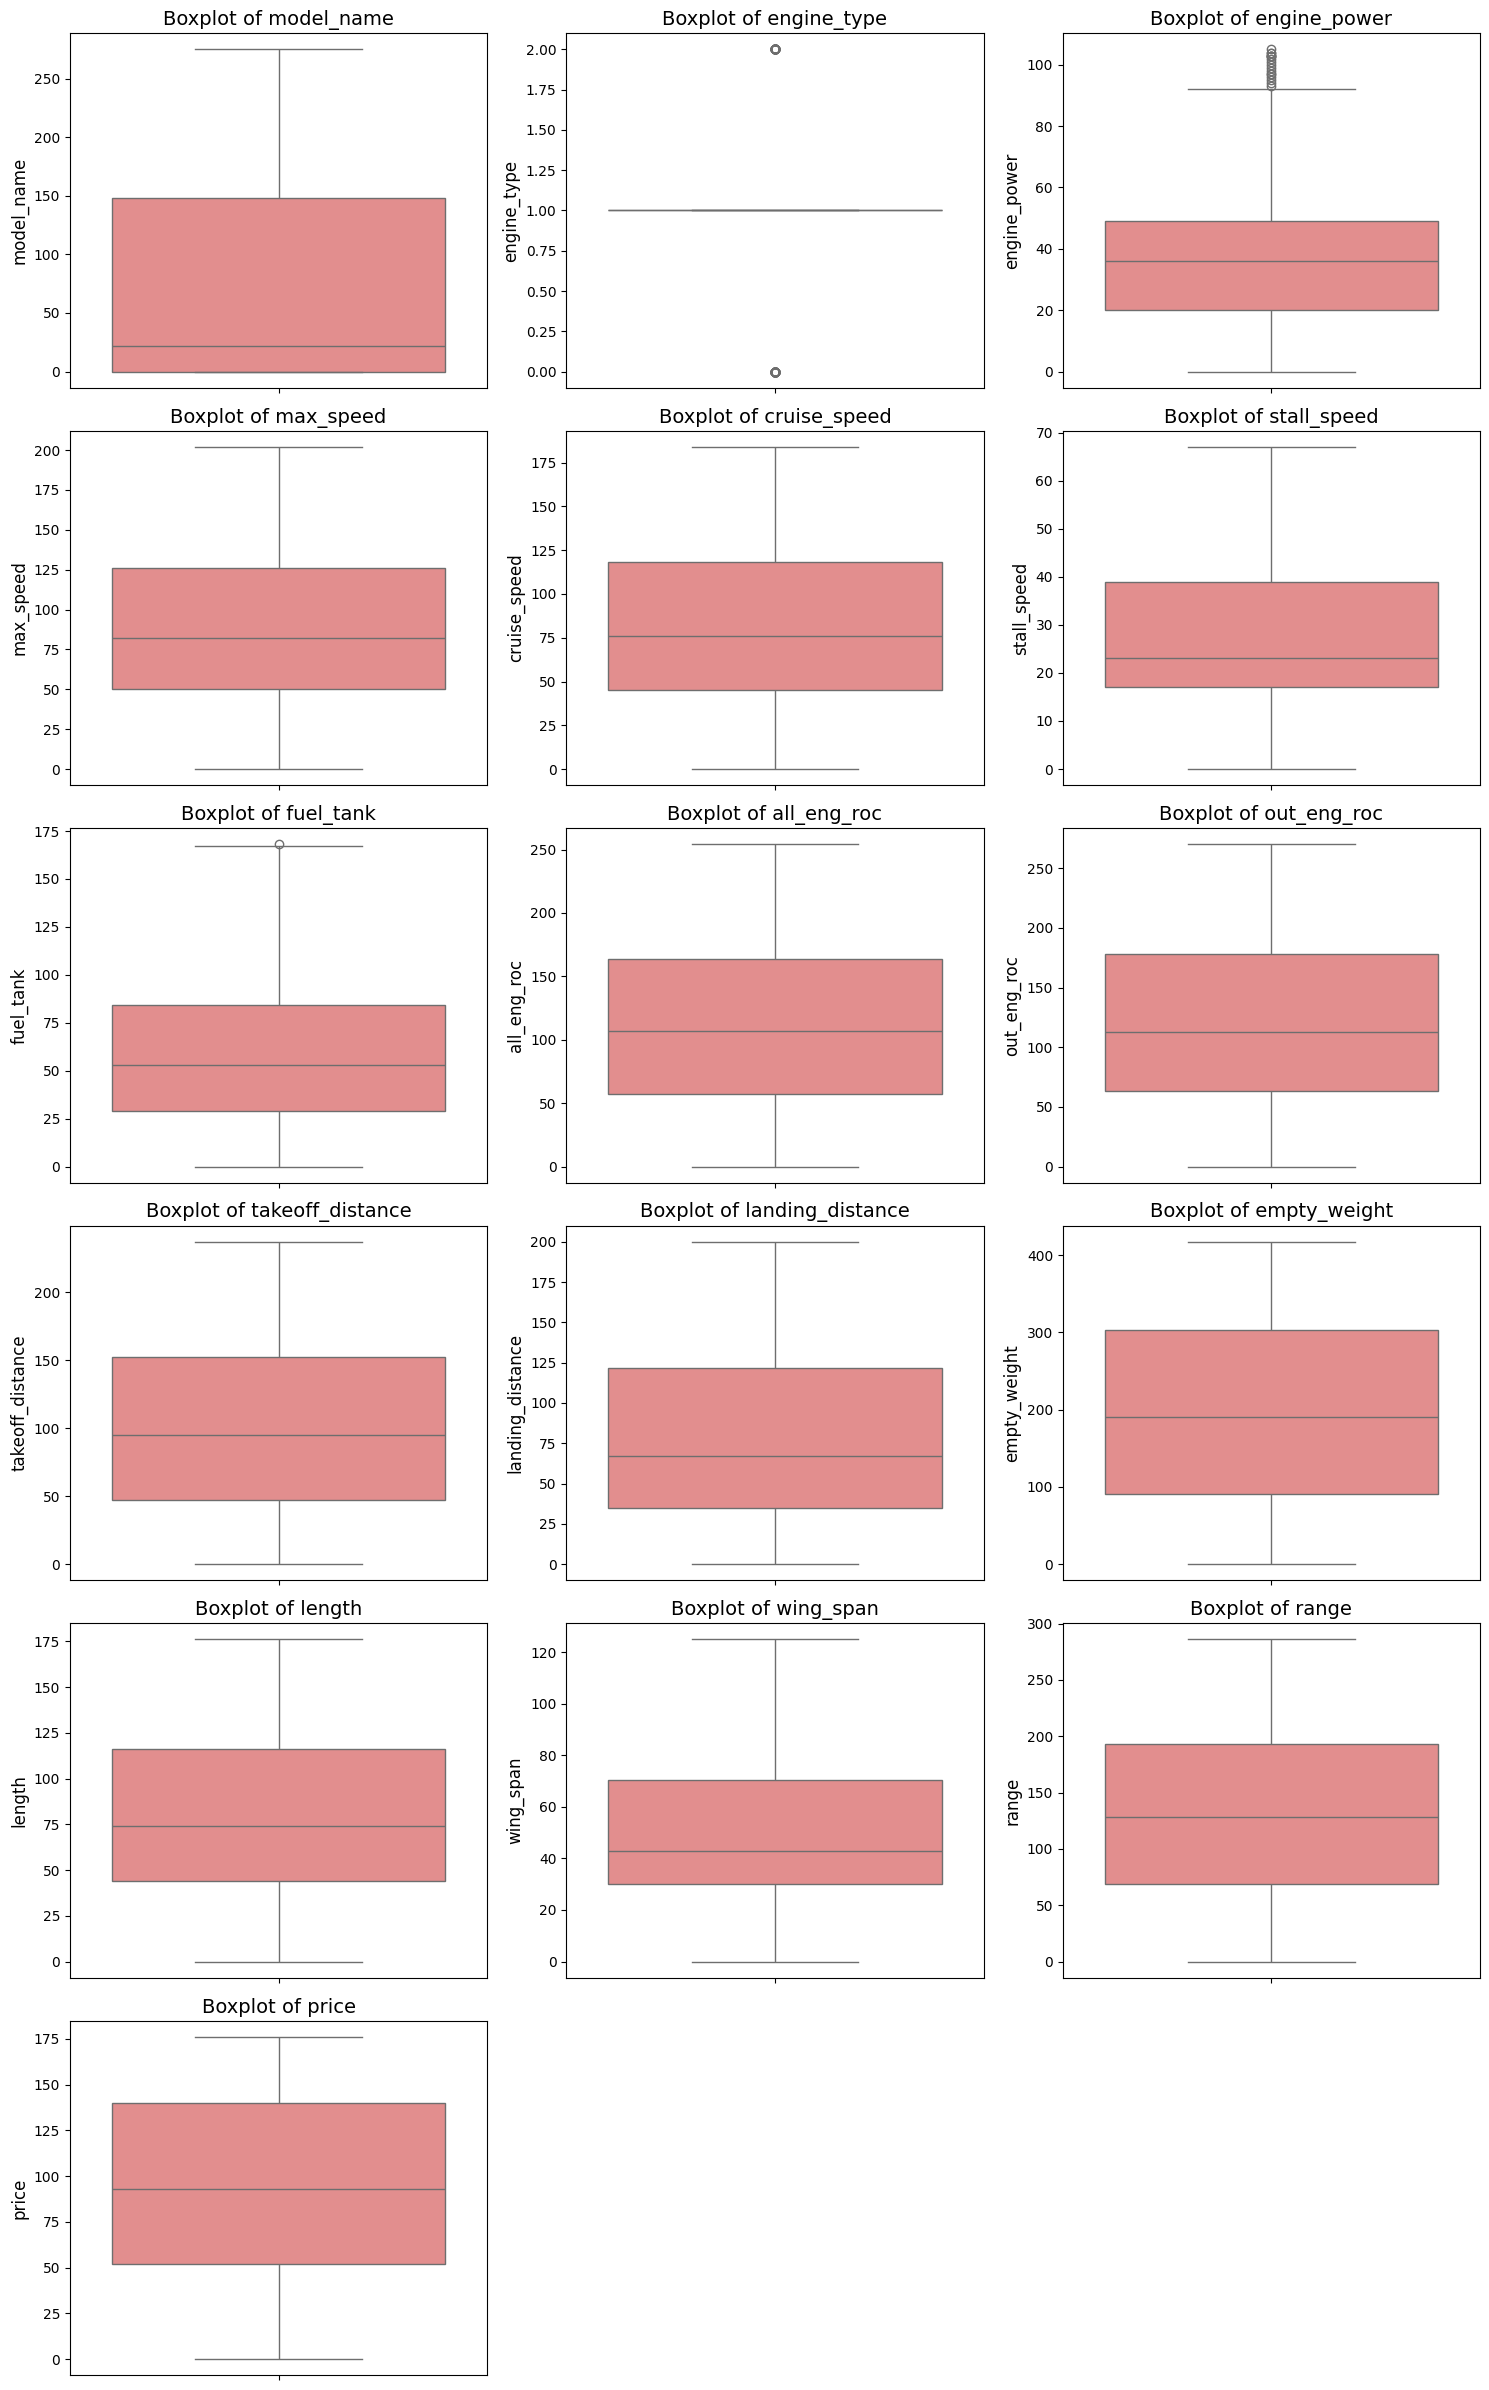

In [23]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

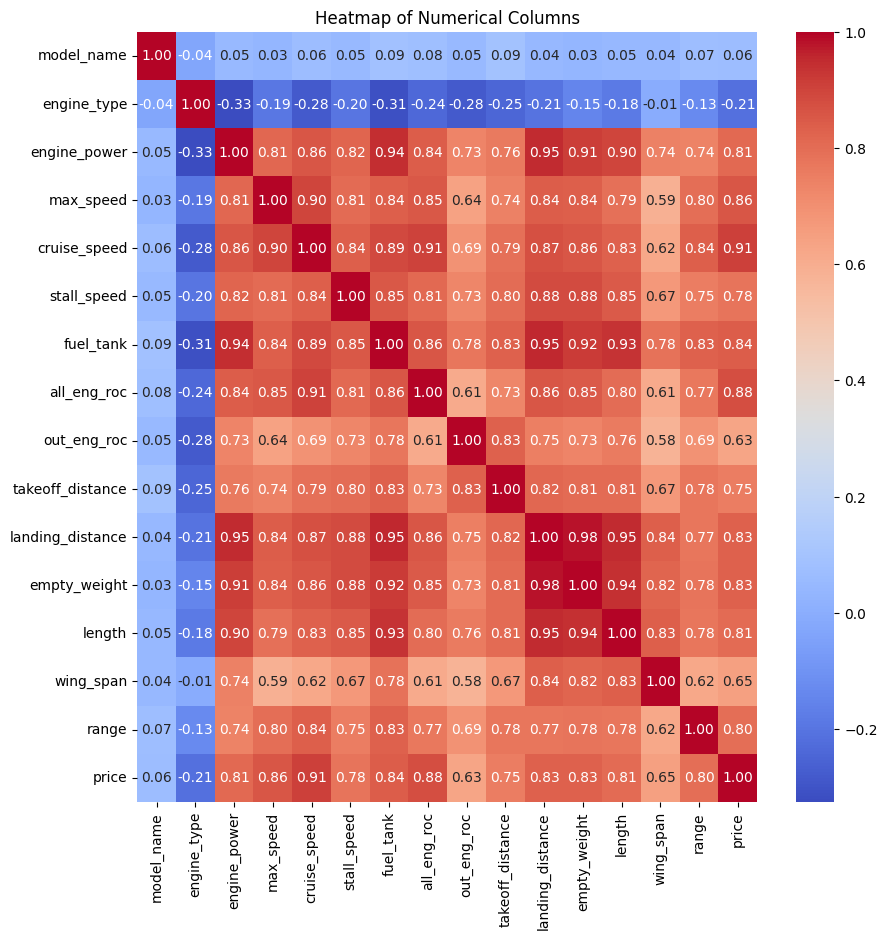

In [24]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [13]:
# Dropping null values

df.dropna(inplace=True)

In [14]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [16]:
X = df.drop('price', axis=1)
y = df['price']

In [17]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [19]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [20]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [21]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.8608936835282498,
 0.8946892023086548,
 0.8981516065587298,
 0.8726851430516605,
 0.8755475937640465,
 0.8784801042193169,
 0.8260083504089346,
 0.7414265561754634,
 0.8454737616219767]